In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import env
import warnings
warnings.filterwarnings('ignore')
import os
import tsa_wrangle as wr

## Exercises

Using your store items data:

   1. Convert date column to datetime format.
   2. Plot the distribution of sale_amount and item_price.
   3. Set the index to be the datetime variable.
   4. Add a 'month' and 'day of week' column to your dataframe.
   5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
   6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [21]:
df = wr.wrangle_store_data()

In [22]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [19]:
# Checking for null values
df.isnull().sum()

store_id         0
item_id          0
item_upc14       0
item_upc12       0
item_brand       0
item_name        0
item_price       0
sale_id          0
sale_amount      0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

Exercise 1

Convert date column to datetime format.

In [23]:
df['sale_date'] = pd.to_datetime(df['sale_date'].str.replace(' 00:00:00 GMT', ''))

In [24]:
df['sale_date']

0        2013-01-01
1        2013-01-02
2        2013-01-03
3        2013-01-04
4        2013-01-05
            ...    
912995   2017-12-27
912996   2017-12-28
912997   2017-12-29
912998   2017-12-30
912999   2017-12-31
Name: sale_date, Length: 913000, dtype: datetime64[ns]

Exercise 2

Plot the distribution of sale_amount and item_price. 

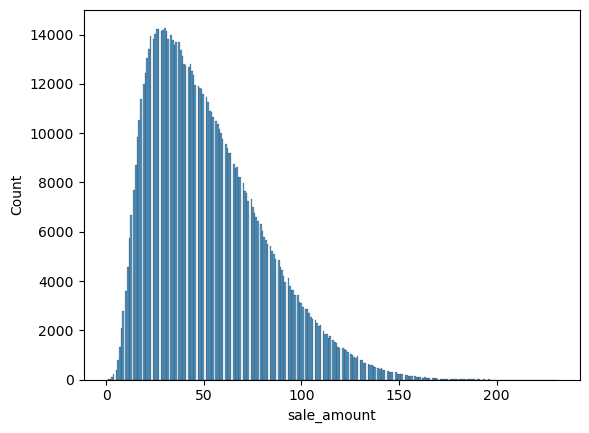

In [10]:
sb.histplot(df['sale_amount'])
plt.show()

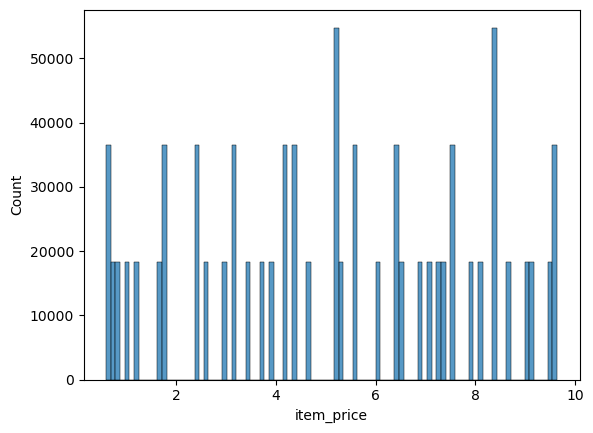

In [11]:
sb.histplot(df['item_price'])
plt.show()

Exercise 3 

Set the index to be the datetime variable.

In [25]:
df = df.set_index('sale_date').sort_index()

In [26]:
df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX


Exercise 4

Add a 'month' and 'day of week' column to your dataframe.

In [41]:
df['month'] = df.index.strftime('%B')

In [32]:
df['year'] = df.index.strftime('%Y')

In [39]:
df['day'] = df.index.day_name()

In [42]:
df.head(3)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,year,day,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,2013,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,2013,Tuesday,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,2013,Tuesday,308.48


Exercise 5

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [36]:
df['sales_total'] = df['sale_amount'] * df['item_price']

In [37]:
df.head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,year,day,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,01,2013,01,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,01,2013,01,30.16


## Part II
Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

   1. Convert date column to datetime format.
   2. Plot the distribution of each of your variables.
   3. Set the index to be the datetime variable.
   4. Add a month and a year column to your dataframe.
   5. Fill any missing values.
   6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


Exercise 2.1

Convert date column to datetime format.

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [45]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [48]:
type(df['Date'])

pandas.core.series.Series

In [49]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [51]:
df['Date']

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 4383, dtype: datetime64[ns]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


#### Exercise 2.2

Plot the distribution of each of your variables. 

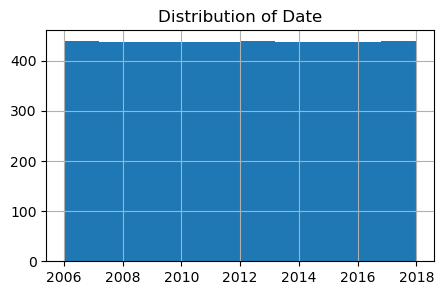

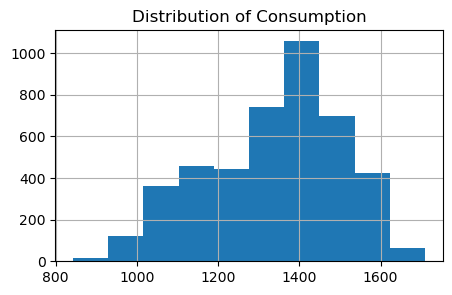

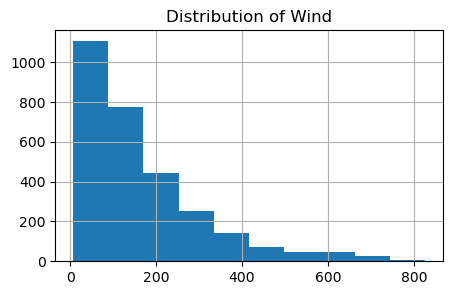

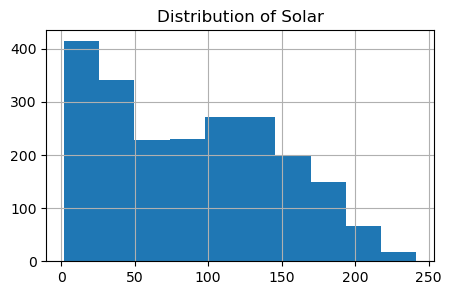

In [55]:
for col in df.columns[:-1]:
    plt.figure(figsize= (5,3))
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

#### Exercise 2.3

Set the index to be the datetime variable. 

In [56]:
df = df.set_index('Date').sort_index()

In [57]:
df.head(2)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN


#### Exercise 2.4

Add a month and a year column to your dataframe.

In [58]:
df['month'] = df.index.strftime('%B')
df['year'] = df.index.strftime('%Y')

In [59]:
df.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006


#### Exercise 2.5

Fill any missing values

In [63]:
df.isnull().sum()
# Yikes! That's a lot of null values. I'll just fill them all with zeroes

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [64]:
df.fillna(0, inplace=True)

In [65]:
df.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006


In [66]:
def german():
    
    df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
    df['Date'] = df['Date'].astype('datetime64[ns]')
    
    df = df.set_index('Date').sort_index()
    
    df['month'] = df.index.strftime('%B')
    df['year'] = df.index.strftime('%Y')
    
    df.fillna(0, inplace=True)
    
    return df